## Лабораторная работа по курсу \"Искусственный интеллект\"
## Многослойный персептрон
###  Собственная реализация

| Студент | Архипов Максим |
|---------|--------|
| Группа  | М8О-307Б-18      |

## Подключение библиотек

Устанавливаем все необходимый библиотеки: pandas, numpy, os, pickle

In [1]:
%pip install pandas
import pickle
import os
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.


## Подготовка датасетов
Объявим функции для анализа датасетов

In [2]:
def count_of_keys(df):
    unique = np.unique(df)
    counts = np.zeros(len(unique), dtype=np.int32)
    for v in df:
        counts[v] += 1
    return counts
def visualization_of_counts(df):
    counts = count_of_keys(df)
    plt.ylabel("Кол-во элементов в классе")
    plt.xlabel("Номер каждого класса")
    plt.bar(np.arange(len(counts)), counts)
    plt.xticks(np.arange(len(counts)), [i for i in range(len(counts))])
def analyze(labels, features, string :str):
    visualization_of_counts(labels)
    print("Данные для [{}]".format(string))
    print("Количество элементов в датасете : {}".format(len(labels)))
    print("Количество атрибутов в элементе : {}".format(len(features[0])))
    print("Минимальное значение атрибута   : {}".format(np.min(features)))
    print("Максимальное значение атрибута  : {}".format(np.max(features)))
    print()

### MNIST

Датасет содержит черно-белые картинки, на которых изображены цифры. 

In [3]:
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)
print(MNIST.keys())

dict_keys(['Train'])


In [4]:
print(MNIST['Train'].keys())

dict_keys(['Labels', 'Features'])


Данные для [MNIST]
Количество элементов в датасете : 42000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Обучающая выборка из MNIST]
Количество элементов в датасете : 33600
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0

Данные для [Тестировочная выборка из MNIST]
Количество элементов в датасете : 8400
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0



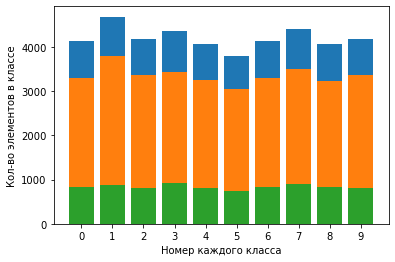

In [5]:
def conv_df(df):
    return np.array(df).astype(np.float32)/255

analyze(MNIST['Train']['Labels'], MNIST['Train']['Features'], "MNIST")

features = conv_df(MNIST['Train']['Features'])
labels = MNIST['Train']['Labels']

mnist_train_x, mnist_test_x, mnist_train_y, mnist_test_y = train_test_split(features,labels,test_size=0.2)

analyze(mnist_train_y, mnist_train_x, "Обучающая выборка из MNIST")
analyze(mnist_test_y, mnist_test_x, "Тестировочная выборка из MNIST")

Подготовили датасет для тестирования, приведем его основные размеры

In [6]:
print("Размер обучающей выборки : {}".format(len(mnist_train_x)))
print("Размер тестовой выборки  : {}".format(len(mnist_test_x)))
print("Размер датасета MNIST    : {}".format(len(features)))

Размер обучающей выборки : 33600
Размер тестовой выборки  : 8400
Размер датасета MNIST    : 42000


### FashionMNIST

In [7]:
%cd fashion-mnist/utils
import mnist_reader
%cd ..
fashion_mnist_train_x_raw, fashion_mnist_train_y = mnist_reader.load_mnist('data/fashion', kind='train')
fashion_mnist_test_x_raw, fashion_mnist_test_y = mnist_reader.load_mnist('data/fashion', kind='t10k')
%cd ..

C:\Users\maxar\fashion-mnist\utils
C:\Users\maxar\fashion-mnist
C:\Users\maxar


Данные для [Обучающая выборка из Fashion MNIST]
Количество элементов в датасете : 60000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Тестировочная выборка из Fashion MNIST]
Количество элементов в датасете : 10000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255



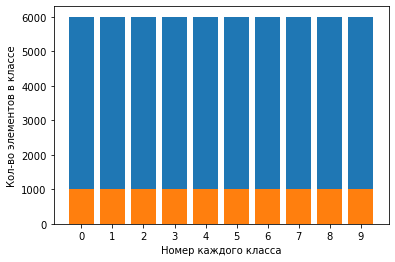

In [8]:
analyze(fashion_mnist_train_y, fashion_mnist_train_x_raw, "Обучающая выборка из Fashion MNIST")
analyze(fashion_mnist_test_y, fashion_mnist_test_x_raw, "Тестировочная выборка из Fashion MNIST")

Так как каждое значение картинки имеет значение от 0 до 255, переведем данные значения в числа с плавающей точкой от 0 до 1.

In [9]:
fashion_mnist_train_x = conv_df(fashion_mnist_train_x_raw)
fashion_mnist_test_x  = conv_df(fashion_mnist_test_x_raw)

In [10]:
print(fashion_mnist_train_x[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627452 

In [11]:
print("Размерр датасета Fashion MNIST : {}".format(len(fashion_mnist_test_x) + len(fashion_mnist_train_x)))

Размерр датасета Fashion MNIST : 70000


## Нейронная сеть (Перцептрон)

### Основные компоненты сети

Так как нейронную сеть можно представить в виде последовательности объектов, которые осуществляют взаимодействие межу собой, будем формировать нейросеть из объектов с методами forward и backward. Методы forward будут использоваться для получения результатов от нейросети, т.е. будет осуществляться прямая прогонка, а методы backward - для осуществления обратного прохода, который будет использоваться для обучения сети.

Базовую нейросеть можно представить в виде последовательности классов, приведенных ниже

In [12]:
class Softmax:
    def forward(self,z):
        self.z = z
        zmax = z.max(axis=1,keepdims=True)
        expz = np.exp(z-zmax)
        Z = expz.sum(axis=1,keepdims=True)
        return expz / Z
    def backward(self,dp):
        p = self.forward(self.z)
        pdp = p * dp
        return pdp - p * pdp.sum(axis=1, keepdims=True)
    
class CrossEntropyLoss:
    def forward(self,p,y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean()
    def backward(self,loss):
        dlog_softmax = np.zeros_like(self.p)
        dlog_softmax[np.arange(len(self.y)), self.y] -= 1.0/len(self.y)
        return dlog_softmax / self.p
    
class Linear:
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)
        
    def forward(self, x):
        self.x=x
        return np.dot(x, self.W.T) + self.b
    
    def backward(self, dz):
        dx = np.dot(dz, self.W)
        dW = np.dot(dz.T, self.x)
        db = dz.sum(axis=0)
        self.dW = dW
        self.db = db
        return dx
    
    def update(self,lr):
        self.W -= lr*self.dW
        self.b -= lr*self.db

class Net:
    def __init__(self):
        self.layers = []
    
    def add(self,l):
        self.layers.append(l)
        
    def forward(self,x):
        for l in self.layers:
            x = l.forward(x)
        return x
    
    def backward(self,z):
        for l in self.layers[::-1]:
            z = l.backward(z)
        return z
    
    def update(self,lr):
        for l in self.layers:
            if 'update' in l.__dir__():
                l.update(lr)
                
class Tanh:
    def forward(self,x):
        y = np.tanh(x)
        self.y = y
        return y
    def backward(self,dy):
        return (1.0-self.y**2)*dy
    def copy(self):
        return Tanh()

Реализуем простую обертку над этимb классами, при помощи которой можно будет реализовать многослойный перцептрон, задав всего несколько параметров. Данный класс будет иметь зависимости от класса Net, а саму сеть можно представить следующим образом:

\[Слой нейросети\] <-> \[Функция активации\] <->  ... <-> \[Функция активации\] <-> \[SoftMax\] <-> \[Функция ошибки\] 

### Класс Perceptron

Класс Perceptron имеет множество необязательных аргументов, которые могут быть отрегулированы программистом (Программист может использовать собственные реализации функции активации, функции потерь, функции softmax и функции потерь). Кроме того программист может передать базовый Python список, в котором будут находится широты внутренних слоев нейросети. Таким образом при помощи одного списка задается кол-во скрытых слоев и их конфигурация.

Процесс обучения вынесен в отдельную функцию fit (как в sklearn), кроме того пользователь может просто предоставить данные нейросети и сам класс вычислит количество входных и выходных нейронов.

Таким образом, чтобы создаь нейроосеть при помощи моего фреймворка достаточно задать широты внутренних нейронов и передать данные для обучения нейросети.

In [33]:
class Perceptron:
    def __init__(self, learning_rate=0.1,epochs=10, soft=Softmax(),act_func=Tanh(),
                layers=[5], loss_func=CrossEntropyLoss(),show_status=False):
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.softmax=soft
        self.act_func=act_func
        self.layers=layers
        self.loss_function=loss_func
        self.show_status=show_status
        self.level=0
     
    def status_print(self, msg, level=-1):
        if level == -1:
            level = self.level
        print("  "*level + msg)
    def create_net(self, X, Y):
        self.net = Net()
        #узнаем ширину слоев нейросети
        layers_settings = self.layers.copy()
        layers_settings.insert(0, len(X[0]))
        layers_settings.append(len(np.unique(Y)))
        self.classes_count = layers_settings[-1]
        if self.show_status:
            self.status_print("Создание сети :")
            self.level += 1
            self.status_print("Количество скрытых слоев     : {}".format(len(layers_settings)-2))
            self.status_print("Количество входных нейронов  : {}".format(layers_settings[0]))
            self.status_print("Koличество выходных нейронов : {}".format(layers_settings[-1]))
            self.status_print("Широты скрытых слоев         : {}".format(self.layers))
            self.level -= 1
            
        #конфигурация нейросети слоями
        for i in range(len(layers_settings)-2):
            self.net.add(Linear(layers_settings[i], layers_settings[i+1]))
            self.net.add(self.act_func.copy())
        #добавляем выходной слой и softmax
        self.net.add(Linear(layers_settings[-2], layers_settings[-1]))
        self.net.add(self.softmax)
        return self    
    
    # надо как-то обучить перцептрон
    def fit(self, X,Y):
        #создадим нейросеть
        self.create_net(X,Y)
        #процесс обучения сети
        
        if self.show_status:
            self.level = 0
            self.status_print("Обучение сети:")
            self.level += 1
            
        for epoch in range(1, self.epochs + 1):
            
            
            self.train_epoch(X, Y)
            if self.show_status:
                self.status_print("[epochs {} in {}] loss : {}, accuracy : {}".format(epoch, self.epochs, *(self.score(X,Y))))
        return self

    def train_epoch(self, train_x, train_y, batch_size=4):
        net = self.net
        loss = self.loss_function
        lr = self.learning_rate
        for i in range(0,len(train_x),batch_size):
            xb = train_x[i:i+batch_size]
            yb = train_y[i:i+batch_size]

            p = net.forward(xb)
            l = loss.forward(p,yb)
            dp = loss.backward(l)
            dx = net.backward(dp)
            net.update(lr)  

    #вычисление вроятнсотей принадлжения каждому возможному классу
    def predict_prob(self, X):
        return self.net.forward(X)
    
    #выдаем наиболее вероятный класс (его номер)
    def predict(self, X):
        return np.argmax(self.predict_prob(X))
    
    def score(self, X,Y, calculate_confusion_matrix=False):
        p = self.net.forward(X)
        l = self.loss_function.forward(p,Y)
        pred = np.argmax(p,axis=1)
        acc = (pred==Y).mean()
        confusion_matrix=[]
        if calculate_confusion_matrix:
            confusion_matrix = np.zeros((self.classes_count, self.classes_count), dtype=np.int32)
            for prd, act in zip (pred, Y):
                confusion_matrix[prd][act] += 1
        return l,acc, confusion_matrix

## Тестирование

### Теститрование на датасете MNIST
Конфигурировать сети будем внутренними слоями с различными широтами.

#### Однослойный перцептрон #### 

In [51]:
null_layered_perceptron = Perceptron(show_status=True, layers=[]).fit(mnist_train_x, mnist_train_y)

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [epochs 1 из 10] loss : 0.3572951412042933, accuracy : 0.895625
  [epochs 2 из 10] loss : 0.3415241331232222, accuracy : 0.8997916666666667
  [epochs 3 из 10] loss : 0.33266670111029895, accuracy : 0.9025297619047619
  [epochs 4 из 10] loss : 0.3261046519579691, accuracy : 0.9044642857142857
  [epochs 5 из 10] loss : 0.32069295633359335, accuracy : 0.9055059523809523
  [epochs 6 из 10] loss : 0.3160060408694578, accuracy : 0.9072321428571428
  [epochs 7 из 10] loss : 0.31187458258432665, accuracy : 0.9084523809523809
  [epochs 8 из 10] loss : 0.3082077613959073, accuracy : 0.9096726190476191
  [epochs 9 из 10] loss : 0.3049375070337054, accuracy : 0.9102083333333333
  [epochs 10 из 10] loss : 0.3020058530851038, accuracy : 0.9107142857142857


In [52]:
print("Точность сети : {}".format(null_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Точность сети : 0.8936904761904761


#### Двуслойные перцептроны #### 
5 нейроного на скрытом слое

In [53]:
first_one_layered_perceptron = Perceptron(show_status=True).fit(mnist_train_x, mnist_train_y)

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [5]
Обучение сети:
  [epochs 1 из 10] loss : 0.6049979556923716, accuracy : 0.8274404761904762
  [epochs 2 из 10] loss : 0.6397010810437083, accuracy : 0.8080952380952381
  [epochs 3 из 10] loss : 0.5552147930194908, accuracy : 0.8392261904761905
  [epochs 4 из 10] loss : 0.542044987939944, accuracy : 0.853125
  [epochs 5 из 10] loss : 0.5597653292278136, accuracy : 0.8482440476190476
  [epochs 6 из 10] loss : 0.5512255777228657, accuracy : 0.8506845238095239
  [epochs 7 из 10] loss : 0.5141884290155895, accuracy : 0.8653571428571428
  [epochs 8 из 10] loss : 0.5292619002175429, accuracy : 0.8571130952380952
  [epochs 9 из 10] loss : 0.538738844943258, accuracy : 0.859672619047619
  [epochs 10 из 10] loss : 0.5438274483253672, accuracy : 0.8563988095238095


In [54]:
print("Точность сети : {}".format(first_one_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Точность сети : 0.8455952380952381


25 нейронов на скрытом слое

In [55]:
third_one_layered_perceptron = Perceptron(show_status=True, layers=[25]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_one_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [25]
Обучение сети:
  [epochs 1 из 10] loss : 0.2662705318624014, accuracy : 0.9195535714285714
  [epochs 2 из 10] loss : 0.20534541601252232, accuracy : 0.937202380952381
  [epochs 3 из 10] loss : 0.1654050339950967, accuracy : 0.9491964285714286
  [epochs 4 из 10] loss : 0.16410967932914244, accuracy : 0.9490773809523809
  [epochs 5 из 10] loss : 0.13315756153281705, accuracy : 0.9586607142857143
  [epochs 6 из 10] loss : 0.13465463395068042, accuracy : 0.9588988095238096
  [epochs 7 из 10] loss : 0.12001825440164193, accuracy : 0.9627678571428572
  [epochs 8 из 10] loss : 0.11268235547629385, accuracy : 0.9649107142857143
  [epochs 9 из 10] loss : 0.13478284291044051, accuracy : 0.9587202380952381
  [epochs 10 из 10] loss : 0.09755938263835577, accuracy : 0.97
Точность сети : 0.9478571428571428


100 нейронов на скрытом слое

In [56]:
fourth_one_layered_perceptron = Perceptron(show_status=True, layers=[100]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(fourth_one_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [100]
Обучение сети:
  [epochs 1 из 10] loss : 0.15420821713693963, accuracy : 0.9536607142857143
  [epochs 2 из 10] loss : 0.11065692648764115, accuracy : 0.9644940476190477
  [epochs 3 из 10] loss : 0.0848903263182959, accuracy : 0.9726785714285714
  [epochs 4 из 10] loss : 0.10741965814716395, accuracy : 0.9638988095238096
  [epochs 5 из 10] loss : 0.07240759584591633, accuracy : 0.9761309523809524
  [epochs 6 из 10] loss : 0.05432748434223256, accuracy : 0.9813095238095239
  [epochs 7 из 10] loss : 0.058686769571296676, accuracy : 0.9803273809523809
  [epochs 8 из 10] loss : 0.0640232011558299, accuracy : 0.978452380952381
  [epochs 9 из 10] loss : 0.03688543241680647, accuracy : 0.9878869047619048
  [epochs 10 из 10] loss : 0.03770413847474852, accuracy : 0.9869940476190476
Точность сети : 0.960952380952381


#### Трехслойные перцептроны #### 

Внутренние слои шириной 5 и 15

In [57]:
first_double_layered_perceptron = Perceptron(show_status=True, layers=[5,15]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(first_double_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [5, 15]
Обучение сети:
  [epochs 1 из 10] loss : 0.6137674180944568, accuracy : 0.832202380952381
  [epochs 2 из 10] loss : 0.6109061066619521, accuracy : 0.8259821428571429
  [epochs 3 из 10] loss : 0.5891703263112175, accuracy : 0.8269047619047619
  [epochs 4 из 10] loss : 0.5934934265228707, accuracy : 0.8376785714285714
  [epochs 5 из 10] loss : 0.5390127405982577, accuracy : 0.8536904761904762
  [epochs 6 из 10] loss : 0.5263869963012194, accuracy : 0.8521726190476191
  [epochs 7 из 10] loss : 0.5316966174547577, accuracy : 0.8532440476190476
  [epochs 8 из 10] loss : 0.6275684581784612, accuracy : 0.8181547619047619
  [epochs 9 из 10] loss : 0.5284158253966577, accuracy : 0.8535714285714285
  [epochs 10 из 10] loss : 0.5513914867645536, accuracy : 0.846220238095238
Точность сети : 0.8444047619047619


Внутренние слои шириной 15 и 10

In [58]:
third_double_layered_perceptron = Perceptron(show_status=True, layers=[20,10]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_double_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 10]
Обучение сети:
  [epochs 1 из 10] loss : 0.3077395908490261, accuracy : 0.9107440476190476
  [epochs 2 из 10] loss : 0.2920944468042885, accuracy : 0.9158630952380953
  [epochs 3 из 10] loss : 0.2804298223343153, accuracy : 0.917172619047619
  [epochs 4 из 10] loss : 0.26987373314155805, accuracy : 0.9199702380952381
  [epochs 5 из 10] loss : 0.253315154021473, accuracy : 0.9279464285714286
  [epochs 6 из 10] loss : 0.21430587498681758, accuracy : 0.9389583333333333
  [epochs 7 из 10] loss : 0.22883554554191815, accuracy : 0.9358928571428572
  [epochs 8 из 10] loss : 0.20960353822580768, accuracy : 0.9413690476190476
  [epochs 9 из 10] loss : 0.24908818689930495, accuracy : 0.9282440476190477
  [epochs 10 из 10] loss : 0.22408321147901297, accuracy : 0.9367559523809523
Точность сети : 0.9203571428571429


### Тестирование на датасете FashionMnist
#### Однослойный перцептрон

In [59]:
fmnist_null_perceptron = Perceptron(show_status=True, layers=[]).fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(fmnist_null_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [epochs 1 из 10] loss : 0.9359345231600675, accuracy : 0.7944166666666667
  [epochs 2 из 10] loss : 0.9156744874567206, accuracy : 0.8039166666666666
  [epochs 3 из 10] loss : 0.8799507779338235, accuracy : 0.8113333333333334
  [epochs 4 из 10] loss : 0.89566969333539, accuracy : 0.8108
  [epochs 5 из 10] loss : 0.8597341170478467, accuracy : 0.8160833333333334
  [epochs 6 из 10] loss : 0.8262980519873773, accuracy : 0.8204166666666667
  [epochs 7 из 10] loss : 0.7956648321156856, accuracy : 0.82515
  [epochs 8 из 10] loss : 0.7572545648109318, accuracy : 0.8319666666666666
  [epochs 9 из 10] loss : 0.7356508001347998, accuracy : 0.8356166666666667
  [epochs 10 из 10] loss : 0.7773243732924447, accuracy : 0.8294
Точность сети : 0.8037


#### Двуслойный перцептрон

In [60]:
fmnist_first_perceptron = Perceptron(show_status=True, layers=[13], learning_rate=0.01).fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(fmnist_first_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [13]
Обучение сети:
  [epochs 1 из 10] loss : 0.4509196845878257, accuracy : 0.8424
  [epochs 2 из 10] loss : 0.4098002416000056, accuracy : 0.8569666666666667
  [epochs 3 из 10] loss : 0.39672821984010936, accuracy : 0.85975
  [epochs 4 из 10] loss : 0.384613601153954, accuracy : 0.8627166666666667
  [epochs 5 из 10] loss : 0.3740892899880581, accuracy : 0.8655833333333334
  [epochs 6 из 10] loss : 0.365232849307868, accuracy : 0.8682
  [epochs 7 из 10] loss : 0.3577445026335538, accuracy : 0.8701
  [epochs 8 из 10] loss : 0.35194399528402404, accuracy : 0.8719666666666667
  [epochs 9 из 10] loss : 0.34758416349456456, accuracy : 0.8737166666666667
  [epochs 10 из 10] loss : 0.3445459963230441, accuracy : 0.8742333333333333
Точность сети : 0.8528


#### Трехслойный перцептрон

In [61]:
fmnist_second_perceptron = Perceptron(show_status=True, layers=[10,15], learning_rate=0.001, epochs=20)
fmnist_second_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(fmnist_second_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [10, 15]
Обучение сети:
  [epochs 1 из 20] loss : 0.7864601580762298, accuracy : 0.7542
  [epochs 2 из 20] loss : 0.5943217567064409, accuracy : 0.8084333333333333
  [epochs 3 из 20] loss : 0.5190489207862984, accuracy : 0.82735
  [epochs 4 из 20] loss : 0.48016843839175116, accuracy : 0.8365166666666667
  [epochs 5 из 20] loss : 0.45616486505649007, accuracy : 0.8436833333333333
  [epochs 6 из 20] loss : 0.4393154983891859, accuracy : 0.8487666666666667
  [epochs 7 из 20] loss : 0.42642597786331476, accuracy : 0.85255
  [epochs 8 из 20] loss : 0.41623078508854966, accuracy : 0.8557333333333333
  [epochs 9 из 20] loss : 0.40797096410601946, accuracy : 0.85835
  [epochs 10 из 20] loss : 0.40115081354522536, accuracy : 0.8601166666666666
  [epochs 11 из 20] loss : 0.3954247878629166, accuracy : 0.8617333333333334
  [epochs 12 из 20] 

#### Четырехслойный перцептрон

### Итоги

Приведем таблицы со статистикой тестирования

| Кол-во внутр-х слоев | Широты внутр-х слоев | Точность на тестовой выборке (%) | Кол-во эпох | Коэф. обучения | Датасет | 
|:--------------------:|:------------:|:--------------------------------:|:-----------:|:-----------:|:-----------:|
| 0 |  | 89 | 10 | 0.1 | MNIST |
| 1 | 5  | 84 | 10 | 0.1  | MNIST |
| 1 | 10 |95 | 10 | 0.1  | MNIST |
| 1 | 100 | 96 | 10 | 0.1  | MNIST |
| 2 | 5, 15 | 84 | 10 | 0.1  | MNIST |
| 2 | 15, 10 | 92 | 10 | 0.1  | MNIST |
| 0 |  | 80 | 10 | 0.1 | FashionMNIST |
| 1 | 13 | 85 | 10 | 0.01 | FashionMNIST |
| 2| 10, 15 | 85 | 20 | 0.001 | FashionMNIST |




Получим confusion matrix для двухслойного перцептрона MNIST (100 нейронов)

In [62]:
fourth_one_layered_confusion_matrix = fourth_one_layered_perceptron.score(mnist_test_x, mnist_test_y,calculate_confusion_matrix=True)[2]
print(fourth_one_layered_confusion_matrix)

[[829   0   2   4   1   3  13   0   6   2]
 [  0 873   1   0   1   0   1   3   9   0]
 [  2   1 788   4   1   0   1   3   9   0]
 [  1   4   8 895   0  14   1   2  33   5]
 [  1   2   5   1 773   2   5   1   3   9]
 [  0   0   0   8   2 716   5   1  19   1]
 [  1   1   1   0   6   6 806   0   5   1]
 [  0   3   5   1   2   0   0 886   1   9]
 [  0   2   2   2   0   0   2   0 716   3]
 [  2   0   2   4  23  10   1   7  26 790]]


## Выводы
Получил собственную нейросеть, основанную на методе обучения с учителем. Веса нейросети регулируются задачей минимизации функции ошибки методом градиентного спуска. Решил задачу классификации для датасетов MNIST, FashionMNIST с помощью 1, 2 и 3-слойного персептрона. Максимальная очность работы нейросети составила 96%.
